## Load data

In [25]:
import pandas as pd

file_paths = [
    r".\GSM5221751_RawCounts_LEC_CTRL_24h_rep1.txt\GSM5221751_RawCounts_LEC_CTRL_24h_rep1.txt",
    r".\GSM5221752_RawCounts_LEC_CTRL_24h_rep2.txt\GSM5221752_RawCounts_LEC_CTRL_24h_rep2.txt",
    r".\GSM5221753_RawCounts_LEC_CTRL_24h_rep3.txt\GSM5221753_RawCounts_LEC_CTRL_24h_rep3.txt",
    r".\GSM5221754_RawCounts_LEC_II4_24h_rep1.txt\GSM5221754_RawCounts_LEC_II4_24h_rep1.txt",
    r".\GSM5221755_RawCounts_LEC_II4_24h_rep2.txt\GSM5221755_RawCounts_LEC_II4_24h_rep2.txt",
    r".\GSM5221756_RawCounts_LEC_II4_24h_rep3.txt\GSM5221756_RawCounts_LEC_II4_24h_rep3.txt",
    r".\GSM5221757_RawCounts_LEC_II4_24h_rep4.txt\GSM5221757_RawCounts_LEC_II4_24h_rep4.txt",
    r".\GSM5221758_RawCounts_LEC_VEGFC_24h_rep1.txt\GSM5221758_RawCounts_LEC_VEGFC_24h_rep1.txt",
    r".\GSM5221759_RawCounts_LEC_VEGFC_24h_rep2.txt\GSM5221759_RawCounts_LEC_VEGFC_24h_rep2.txt",
    r".\GSM5221760_RawCounts_LEC_VEGFC_24h_rep3.txt\GSM5221760_RawCounts_LEC_VEGFC_24h_rep3.txt",
    r".\GSM5221761_RawCounts_LEC_VEGFC_24h_rep4.txt\GSM5221761_RawCounts_LEC_VEGFC_24h_rep4.txt"
]

sample_names = [
    "CTRL1", "CTRL2", "CTRL3",
    "II41", "II42", "II43", "II44",
    "VEGFC1", "VEGFC2", "VEGFC3", "VEGFC4"
]

dfs = [pd.read_csv(f, sep="\t", header=None, names=["Gene", sample], index_col=0) for f, sample in zip(file_paths, sample_names)]
counts = pd.concat(dfs, axis=1)
counts.columns = sample_names

counts.index.name = 'Symbol'

counts

,CTRL1,CTRL2,CTRL3,II41,II42,II43,II44,VEGFC1,VEGFC2,VEGFC3,VEGFC4
Symbol,,,,,,,,,,,
A1BG,58,66,40,62,78,52,78,10,58,34,34
A1BG-AS1,212,148,168,122,122,100,158,72,96,112,94
A1CF,0,0,0,0,0,0,0,0,0,0,0
A2M,33780,30568,36412,22342,27918,27870,24578,18190,21666,22182,26416
A2M-AS1,22,26,24,28,28,42,28,42,38,50,36
...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0,0,0,0,0,4,0,4,4,0,0
ZYG11B,764,708,808,504,556,620,674,790,524,634,686
ZYX,4022,3694,4170,4906,5952,5888,6158,4540,6654,6042,6558


## Analyse counts

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
gene_nodes = ["PROX1", "PDPN", "FLT4", "LYVE1", 
    "NOTCH1","NOTCH2", "NOTCH3", "NOTCH4", "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
    "VLDLR", "LRP8", "RELN", "DAB1", "DAB2", "SH3KBP1", "FYN",
    "MIB1", "MIB2", "NEURL1", "NEURL2", "NEURL3", "NEURL4", 
    "ADAM10", "ADAM17", 
    "PSEN1", "PSEN2", "PSENEN", "APH1A", "APH1B", "NCSTN", 
    "KPNA4", "KPNA3", "KPNA6", 
    "TBL1X", "HDAC3", "NCOR1", "NCOR2", "RBPJ", "SNW1", 
    "MAML1", "MAML2", "MAML3", "KAT2B", "EP300", "CREBBP", 
    "CDK8", "CCNC",
    "SKP1", "RBX1", "CUL1", "FBXW7",
    "HES1", "HES5", "HEY1", "HEY2", "HEYL", "MYC"]

missing_genes = set(gene_nodes) - set(counts.index)
print("Missing genes:", missing_genes)

Missing genes: set()


<Figure size 1600x1000 with 0 Axes>

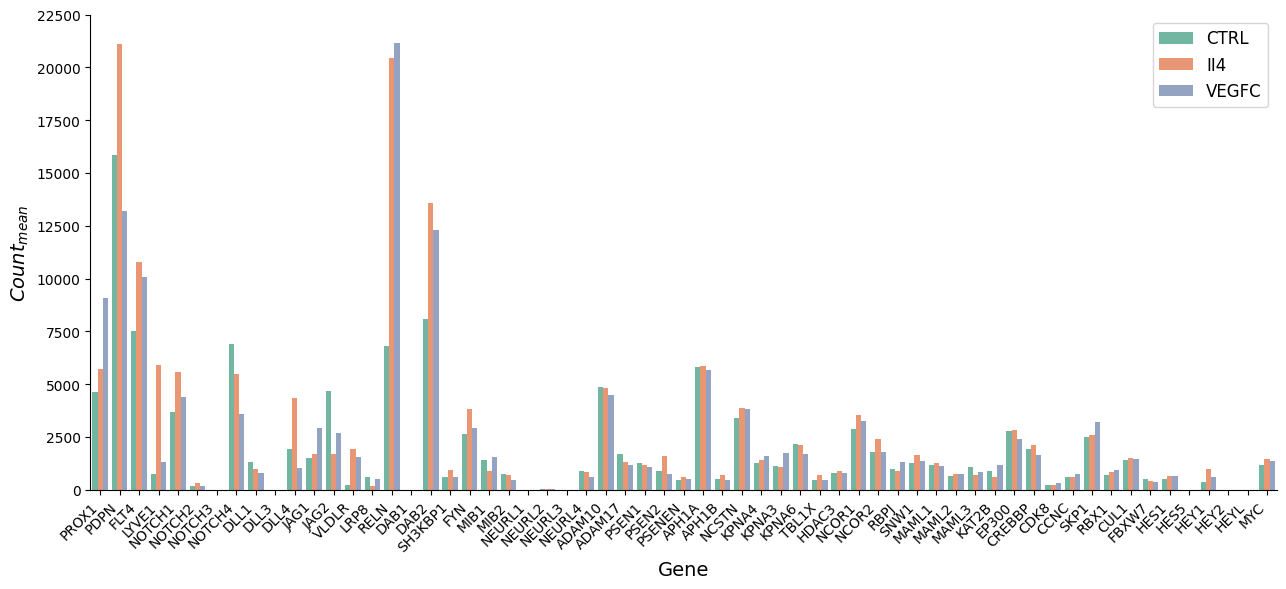

,Gene,Condition,Mean_Count
0,ADAM10,CTRL,4866.666667
1,ADAM17,CTRL,1679.333333
2,APH1A,CTRL,5816.666667
3,APH1B,CTRL,512.666667
4,CCNC,CTRL,584.000000
...,...,...,...
178,SH3KBP1,VEGFC,621.500000
179,SKP1,VEGFC,3227.500000
180,SNW1,VEGFC,1384.000000
181,TBL1X,VEGFC,444.500000


In [28]:
filtered_counts = counts.loc[counts.index.intersection(gene_nodes)]

conditions = {
    "CTRL": ["CTRL1", "CTRL2", "CTRL3"],
    "II4": ["II41", "II42", "II43", "II44"],
    "VEGFC": ["VEGFC1", "VEGFC2", "VEGFC3", "VEGFC4"]
}

mean_counts = pd.DataFrame({cond: filtered_counts[samples].mean(axis=1) for cond, samples in conditions.items()})
mean_counts["Gene"] = mean_counts.index
melted = mean_counts.melt(id_vars="Gene", var_name="Condition", value_name="Mean_Count")

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$Count_{mean}$", fontsize=14)
g._legend.remove()
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()
melted

<Figure size 1600x1000 with 0 Axes>

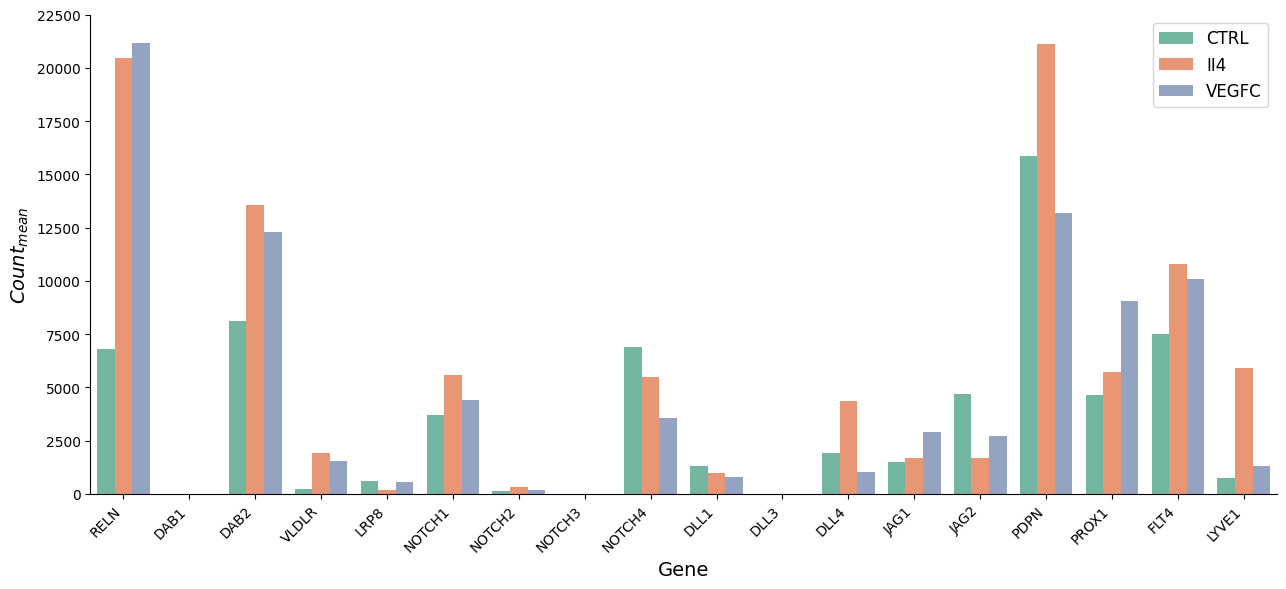

In [29]:
few_gene_nodes = ["RELN", "DAB1", "DAB2", "VLDLR", "LRP8", 
                  "NOTCH1", "NOTCH2", "NOTCH3", "NOTCH4", 
                  "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
                  "PDPN", "PROX1", "FLT4", "LYVE1"]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=few_gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$Count_{mean}$", fontsize=14)
g._legend.remove()
plt.tight_layout()
plt.legend(fontsize=12, loc='best')
plt.show()

<span style="color:red">Commentary</span>: Raw read counts alone are not sufficient to compare expression levels among samples, as these values are affected by factors such as transcript length, total number of reads, and sequencing biases. https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-0881-8 (doi: 10.1186/s13059-016-0881-8). But the counts show that DAB1 is not expressed in the dataset.

## 1st method: normalize by the highest value for each sample

In [30]:
normalized_counts = counts.divide(counts.max())
max_indices = counts.idxmax()  

print('Genes having the highest counts per sample:\n')
for sample in counts.columns:
    gene = max_indices[sample]
    value = counts.at[gene, sample]
    print(f"{sample}: {gene} (Count value: {value:.3f})")
    
lec_markers = ['PROX1', 'PDPN', 'LYVE1', 'FLT4']

print('\nRaw counts for LEC markers:\n')
for gene in lec_markers:
    if gene in counts.index:
        values = counts.loc[gene]
        print(f"{gene}:")
        for sample, value in values.items():
            print(f"  {sample}: {value:.3f}")
    else:
        print(f"{gene}: not found in counts")

Genes having the highest counts per sample:

CTRL1: COL4A2 (Count value: 211178.000)
CTRL2: COL4A2 (Count value: 199754.000)
CTRL3: COL4A2 (Count value: 227116.000)
II41: VWF (Count value: 221760.000)
II42: VWF (Count value: 241860.000)
II43: VWF (Count value: 231356.000)
II44: VWF (Count value: 251996.000)
VEGFC1: FN1 (Count value: 288642.000)
VEGFC2: FN1 (Count value: 286456.000)
VEGFC3: FN1 (Count value: 251492.000)
VEGFC4: FN1 (Count value: 325588.000)

Raw counts for LEC markers:

PROX1:
  CTRL1: 4768.000
  CTRL2: 3982.000
  CTRL3: 5198.000
  II41: 5724.000
  II42: 5492.000
  II43: 6138.000
  II44: 5544.000
  VEGFC1: 11404.000
  VEGFC2: 7378.000
  VEGFC3: 8980.000
  VEGFC4: 8534.000
PDPN:
  CTRL1: 15666.000
  CTRL2: 15024.000
  CTRL3: 16854.000
  II41: 18434.000
  II42: 22094.000
  II43: 22062.000
  II44: 21836.000
  VEGFC1: 12566.000
  VEGFC2: 12116.000
  VEGFC3: 14076.000
  VEGFC4: 14024.000
LYVE1:
  CTRL1: 612.000
  CTRL2: 788.000
  CTRL3: 874.000
  II41: 5614.000
  II42: 5866.

<span style="color:red">Commentary</span>: Normalizing each sample independently by its highest expression value results in non-interpretable outputs, particularly for genes with relatively low expression. This approach causes lymphatic endothelial cell (LEC) markers such as PDPN, PROX1, LYVE-1, and FLT4 to appear artificially suppressed, often approaching zero. Consequently, this method fails to reflect the actual biological variability or relative gene activity between samples. Moreover, it cannot provide meaningful insights into the likelihood of a gene being transcriptionally active or inactive, as the normalization distorts the relative expression landscape across the dataset.


## 2nd method: normalize by the highest value for each sample conserving only the genes related to the map

In [31]:
counts_2nd = counts.loc[counts.index.intersection(gene_nodes)]
counts_2nd


,CTRL1,CTRL2,CTRL3,II41,II42,II43,II44,VEGFC1,VEGFC2,VEGFC3,VEGFC4
Symbol,,,,,,,,,,,
ADAM10,4868,4576,5156,3876,5290,4952,5130,5018,3780,4410,4698
ADAM17,1606,1582,1850,1152,1398,1360,1410,1266,950,1160,1230
APH1A,6012,5356,6082,5032,6250,6010,6068,3924,5760,6250,6698
APH1B,552,456,530,578,704,744,784,484,346,502,452
CCNC,606,538,608,498,636,672,632,916,586,692,800
...,...,...,...,...,...,...,...,...,...,...,...
SH3KBP1,618,564,610,838,948,958,984,590,580,630,686
SKP1,2574,2298,2640,2236,2694,2824,2648,3650,2896,3028,3336
SNW1,1270,1252,1288,1454,1758,1750,1660,1282,1304,1390,1560


In [32]:
normalized_counts = counts_2nd.divide(counts_2nd.max(), axis=1)
max_indices = counts_2nd.idxmax() 

print('Genes having the highest counts per sample:\n')
for sample in counts.columns:
    gene = max_indices[sample]
    value = counts.at[gene, sample]
    print(f"{sample}: {gene} (Count value: {value:.3f})")
    
normalized_counts

Genes having the highest counts per sample:

CTRL1: PDPN (Count value: 15666.000)
CTRL2: PDPN (Count value: 15024.000)
CTRL3: PDPN (Count value: 16854.000)
II41: RELN (Count value: 19954.000)
II42: PDPN (Count value: 22094.000)
II43: PDPN (Count value: 22062.000)
II44: RELN (Count value: 22384.000)
VEGFC1: RELN (Count value: 19422.000)
VEGFC2: RELN (Count value: 18484.000)
VEGFC3: RELN (Count value: 24990.000)
VEGFC4: RELN (Count value: 21800.000)


,CTRL1,CTRL2,CTRL3,II41,II42,II43,II44,VEGFC1,VEGFC2,VEGFC3,VEGFC4
Symbol,,,,,,,,,,,
ADAM10,0.310737,0.304579,0.305921,0.194247,0.239432,0.224458,0.229182,0.258367,0.204501,0.176471,0.215505
ADAM17,0.102515,0.105298,0.109766,0.057733,0.063275,0.061644,0.062991,0.065184,0.051396,0.046419,0.056422
APH1A,0.383761,0.356496,0.360864,0.252180,0.282882,0.272414,0.271086,0.202039,0.311621,0.250100,0.307248
APH1B,0.035236,0.030351,0.031447,0.028967,0.031864,0.033723,0.035025,0.024920,0.018719,0.020088,0.020734
CCNC,0.038682,0.035809,0.036075,0.024957,0.028786,0.030460,0.028234,0.047163,0.031703,0.027691,0.036697
...,...,...,...,...,...,...,...,...,...,...,...
SH3KBP1,0.039448,0.037540,0.036193,0.041997,0.042908,0.043423,0.043960,0.030378,0.031378,0.025210,0.031468
SKP1,0.164305,0.152955,0.156639,0.112058,0.121934,0.128003,0.118299,0.187931,0.156676,0.121168,0.153028
SNW1,0.081067,0.083333,0.076421,0.072868,0.079569,0.079322,0.074160,0.066008,0.070548,0.055622,0.071560


<span style="color:red">Commentary</span>: Normalizing each sample independently by its maximum expression value distorts the biological relevance of the data, especially when applied to input state initialization in a Boolean model. This method disproportionately downscales moderately or even highly expressed model-relevant genes when a few unrelated genes dominate the expression profile. As a result, critical regulators such as NOTCH1 or RELN receive artificially low probabilities, failing to represent their true biological activity. This compression of expression values toward zero also hampers the ability to distinguish active from inactive states across samples. Therefore, this normalization strategy is unsuitable for defining biologically meaningful initial conditions in MaBoSS simulations and was excluded from further analysis.

## Use log2 to reduce difference of expression

In [33]:
import numpy as np

In [34]:
counts_log2 = np.log2(counts + 1)
counts_log2

,CTRL1,CTRL2,CTRL3,II41,II42,II43,II44,VEGFC1,VEGFC2,VEGFC3,VEGFC4
Symbol,,,,,,,,,,,
A1BG,5.882643,6.066089,5.357552,5.977280,6.303781,5.727920,6.303781,3.459432,5.882643,5.129283,5.129283
A1BG-AS1,7.734710,7.219169,7.400879,6.942515,6.942515,6.658211,7.312883,6.189825,6.599913,6.820179,6.569856
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,15.043924,14.899782,15.152166,14.447535,14.768960,14.766477,14.585139,14.150937,14.403212,14.437167,14.689179
A2M-AS1,4.523562,4.754888,4.643856,4.857981,4.857981,5.426265,4.857981,5.426265,5.285402,5.672425,5.209453
...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.000000,0.000000,0.000000,0.000000,0.000000,2.321928,0.000000,2.321928,2.321928,0.000000,0.000000
ZYG11B,9.579316,9.469642,9.659996,8.980140,9.121534,9.278449,9.398744,9.627534,9.036174,9.310613,9.424166
ZYX,11.974056,11.851359,12.026178,12.260626,12.539401,12.523807,12.588480,12.148794,12.700223,12.561049,12.679260


<Figure size 1600x1000 with 0 Axes>

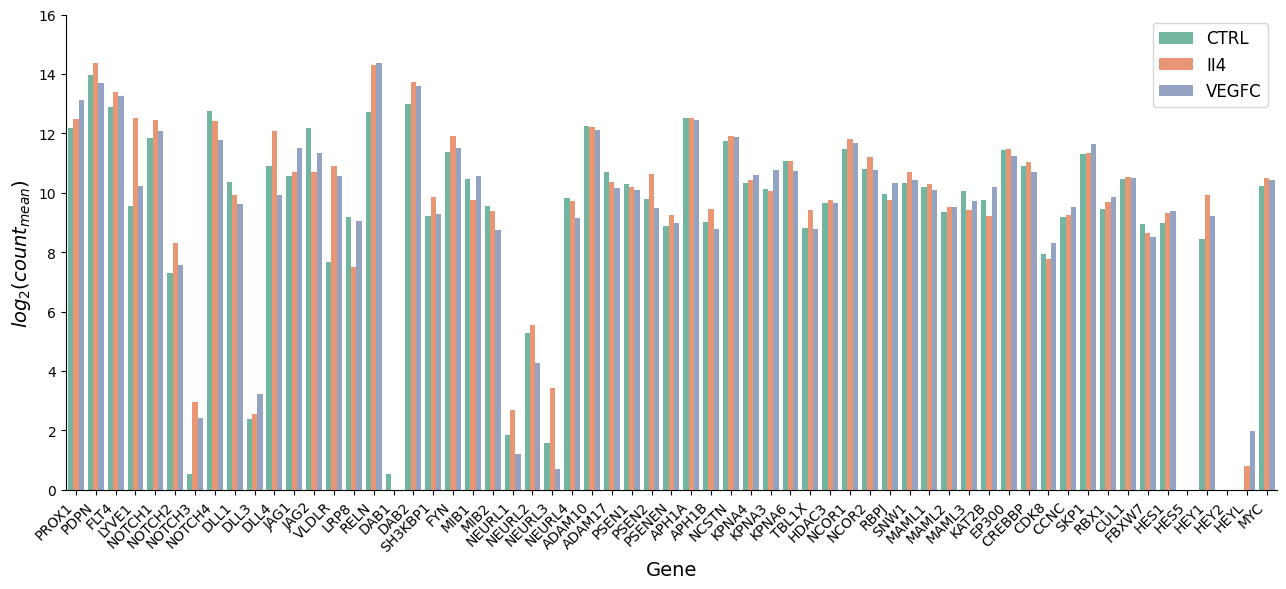

In [35]:
filtered_counts_log2 = counts_log2.loc[counts_log2.index.intersection(gene_nodes)]

conditions = {
    "CTRL": ["CTRL1", "CTRL2", "CTRL3"],
    "II4": ["II41", "II42", "II43", "II44"],
    "VEGFC": ["VEGFC1", "VEGFC2", "VEGFC3", "VEGFC4"]
}

mean_counts_log2 = pd.DataFrame({cond: filtered_counts_log2[samples].mean(axis=1) for cond, samples in conditions.items()})
mean_counts_log2["Gene"] = mean_counts_log2.index
melted_log2 = mean_counts_log2.melt(id_vars="Gene", var_name="Condition", value_name="Mean_Count")

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_log2, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$log_2$($count_{mean}$)", fontsize=14)
g._legend.remove()
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

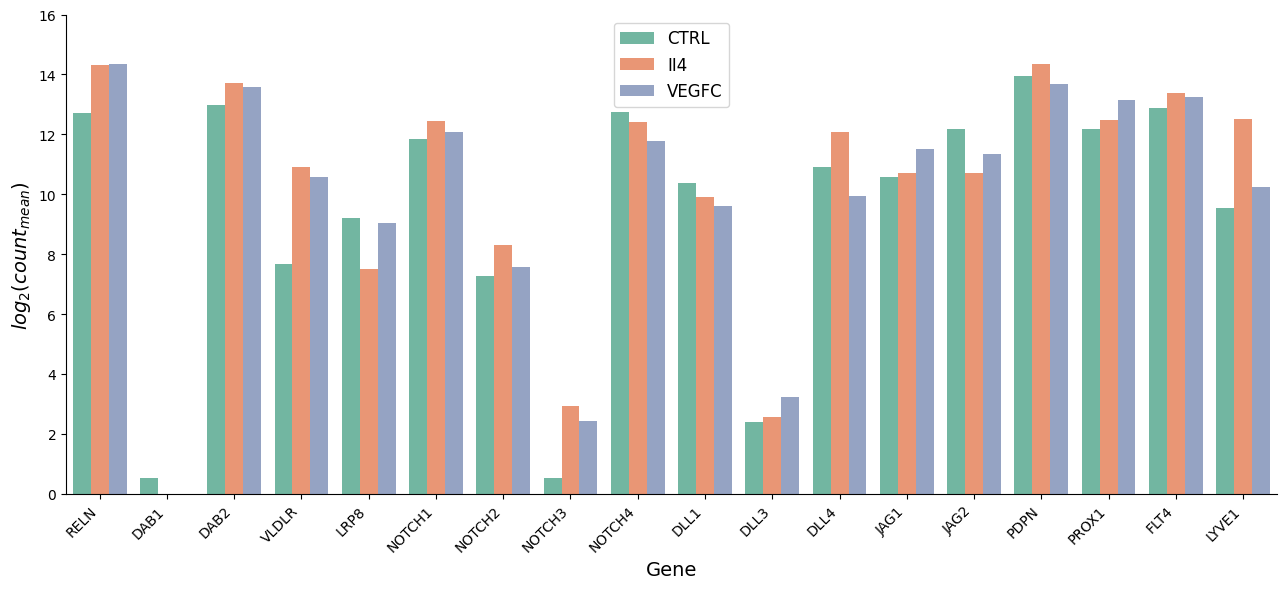

In [36]:
few_gene_nodes = ["RELN", "DAB1", "DAB2", "VLDLR", "LRP8", 
                  "NOTCH1", "NOTCH2", "NOTCH3", "NOTCH4", 
                  "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
                  "PDPN", "PROX1", "FLT4", "LYVE1"]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_log2, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=few_gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$log_2$($count_{mean}$)", fontsize=14)
g._legend.remove()
plt.tight_layout()
plt.legend(fontsize=12, loc='best')
plt.show()

## 3rd method: normalizing using DESeq2 (as done by Ahmed) --> Inter sample comparison not within sample comparison

In [37]:
from pydeseq2.dds import DeseqDataSet
import pandas as pd
import os

In [38]:
counts_T = counts.T

metadata = pd.DataFrame(zip(counts_T.index, ['Control', 'Control', 'Control',
                                           'II4', 'II4', 'II4', 'II4',
                                           'VEGFC', 'VEGFC', 'VEGFC', 'VEGFC']), 
                        columns = ['Sample', 'Condition'])
metadata = metadata.set_index('Sample')

GSE_name = "GSE171278"
os.makedirs(f"{GSE_name}_outputs", exist_ok=True)
metadata.to_csv(r'.\GSE171278_outputs\GSE171278_DESeq2_metadata.csv', sep=',')

metadata

,Condition
Sample,
CTRL1,Control
CTRL2,Control
CTRL3,Control
II41,II4
II42,II4
II43,II4
II44,II4
VEGFC1,VEGFC
VEGFC2,VEGFC


In [39]:
dds = DeseqDataSet(counts=counts_T, metadata=metadata, design_factors='Condition')
dds.deseq2()
dds

C:\Users\Yanis\AppData\Local\Temp\ipykernel_16712\1947885380.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=counts_T, metadata=metadata, design_factors='Condition')
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.70 seconds.

Fitting dispersion trend curve...
... done in 0.27 seconds.

Fitting MAP dispersions...
... done in 1.87 seconds.

Fitting LFCs...
... done in 1.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



AnnData object with n_obs × n_vars = 11 × 26334
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [40]:
import numpy as np

In [41]:
normed_counts_df = pd.DataFrame(
    dds.layers['normed_counts'].T,
    index=dds.var_names,
    columns=dds.obs_names
)

normed_counts_df = normed_counts_df.loc[normed_counts_df.index.intersection(gene_nodes)]
normed_counts_df.to_csv(r'.\GSE171278_outputs\GSE171278_DESeq2_norm.csv', sep=',')
normed_counts_df

Sample,CTRL1,CTRL2,CTRL3,II41,II42,II43,II44,VEGFC1,VEGFC2,VEGFC3,VEGFC4
Symbol,,,,,,,,,,,
ADAM10,4908.095020,5058.635272,5111.580411,4066.185394,4753.191634,4553.678553,4520.159019,5764.679864,4072.312688,4419.609432,4517.997820
ADAM17,1619.227733,1748.855114,1834.062017,1208.525690,1256.136466,1250.606388,1242.382888,1454.381169,1023.464829,1162.527651,1182.872992
APH1A,6061.517515,5920.902647,6029.602804,5278.907354,5615.774615,5526.576757,5346.652032,4507.892345,6205.428858,6263.618810,6441.368539
APH1B,556.546518,504.094774,525.433983,606.360980,632.560853,684.155259,690.800131,556.019341,372.756664,503.093863,434.681783
CCNC,610.991286,594.743395,602.762003,522.435585,571.461225,617.946686,556.869493,1052.301067,631.316200,693.507875,769.348288
...,...,...,...,...,...,...,...,...,...,...,...
SH3KBP1,623.090124,623.485641,604.744773,879.118514,851.800694,880.941852,867.024654,677.792172,624.852211,631.372776,659.716157
SKP1,2595.200613,2540.372346,2617.256067,2345.714794,2420.623490,2596.847381,2333.212686,4193.121065,3119.951731,3034.598041,3208.182360
SNW1,1280.460287,1384.049685,1276.903718,1525.344057,1579.605084,1609.236161,1462.663542,1472.761974,1404.840144,1393.028823,1500.229161


<Figure size 1600x1000 with 0 Axes>

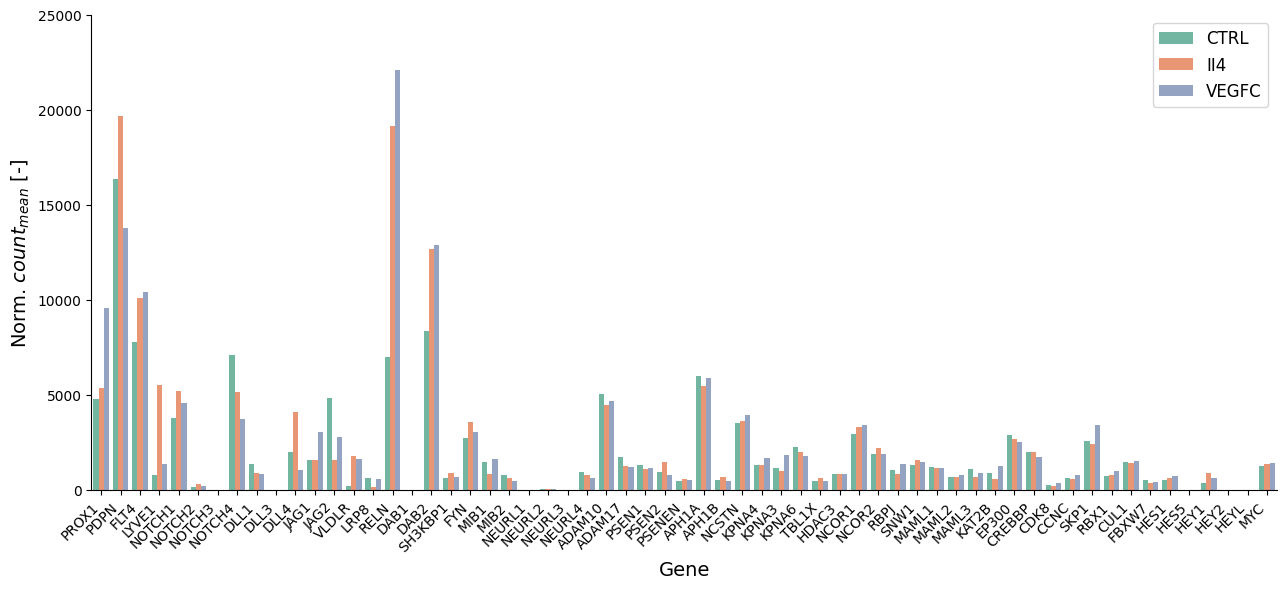

,Gene,Condition,Mean_Count
0,ADAM10,CTRL,5026.103567
1,ADAM17,CTRL,1734.048288
2,APH1A,CTRL,6004.007655
3,APH1B,CTRL,528.691758
4,CCNC,CTRL,602.832228
...,...,...,...
178,SH3KBP1,VEGFC,648.433329
179,SKP1,VEGFC,3388.963299
180,SNW1,VEGFC,1442.715026
181,TBL1X,VEGFC,463.045295


In [42]:
conditions = {
    "CTRL": ["CTRL1", "CTRL2", "CTRL3"],
    "II4": ["II41", "II42", "II43", "II44"],
    "VEGFC": ["VEGFC1", "VEGFC2", "VEGFC3", "VEGFC4"]
}

mean_counts_norm = pd.DataFrame({cond: normed_counts_df[samples].mean(axis=1) for cond, samples in conditions.items()})
mean_counts_norm["Gene"] = mean_counts_norm.index
melted_norm = mean_counts_norm.melt(id_vars="Gene", var_name="Condition", value_name="Mean_Count")

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_norm, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"Norm. $count_{mean}$ [-]", fontsize=14)
g._legend.remove()
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.savefig(r'.\GSE171278_outputs\GSE171278_DESeq2_norm_mean_counts.png', dpi=600)
plt.show()
melted_norm

<Figure size 1600x1000 with 0 Axes>

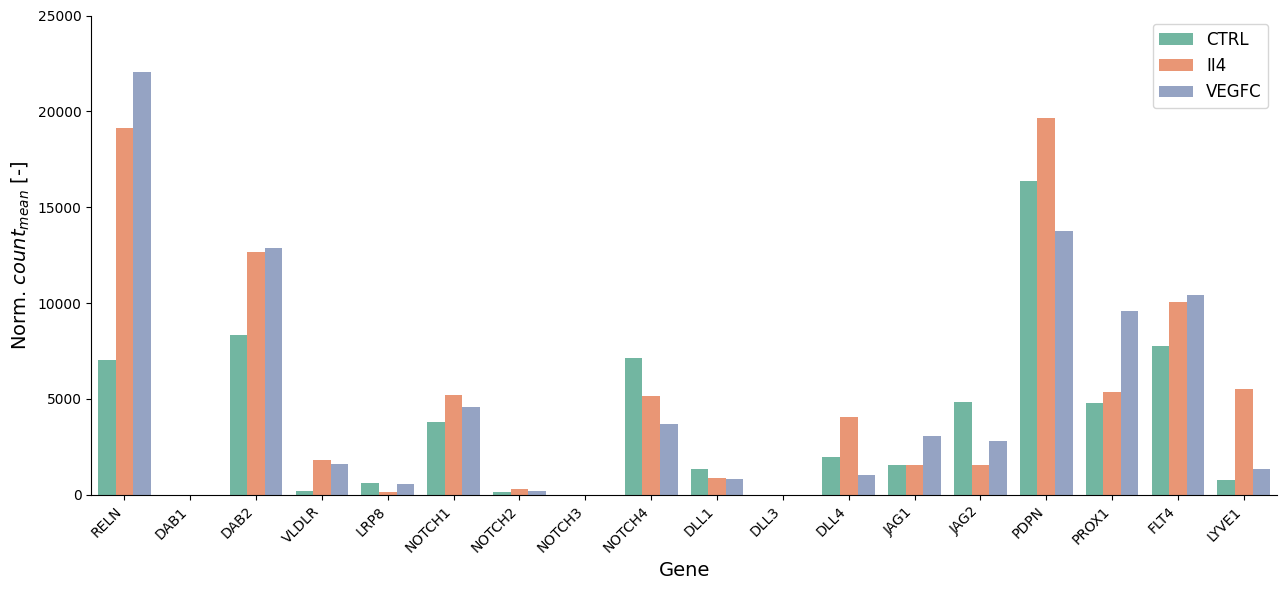

In [43]:
few_gene_nodes = ["RELN", "DAB1", "DAB2", "VLDLR", "LRP8", 
                  "NOTCH1", "NOTCH2", "NOTCH3", "NOTCH4", 
                  "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
                  "PDPN", "PROX1", "FLT4", "LYVE1"]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_norm, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=few_gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"Norm. $count_{mean}$ [-]", fontsize=14)
g._legend.remove()
plt.tight_layout()
plt.legend(fontsize=12, loc='best')
plt.savefig(r'.\GSE171278_outputs\GSE171278_DESeq2_norm_mean_counts_few_genes.png', dpi=600)
plt.show()

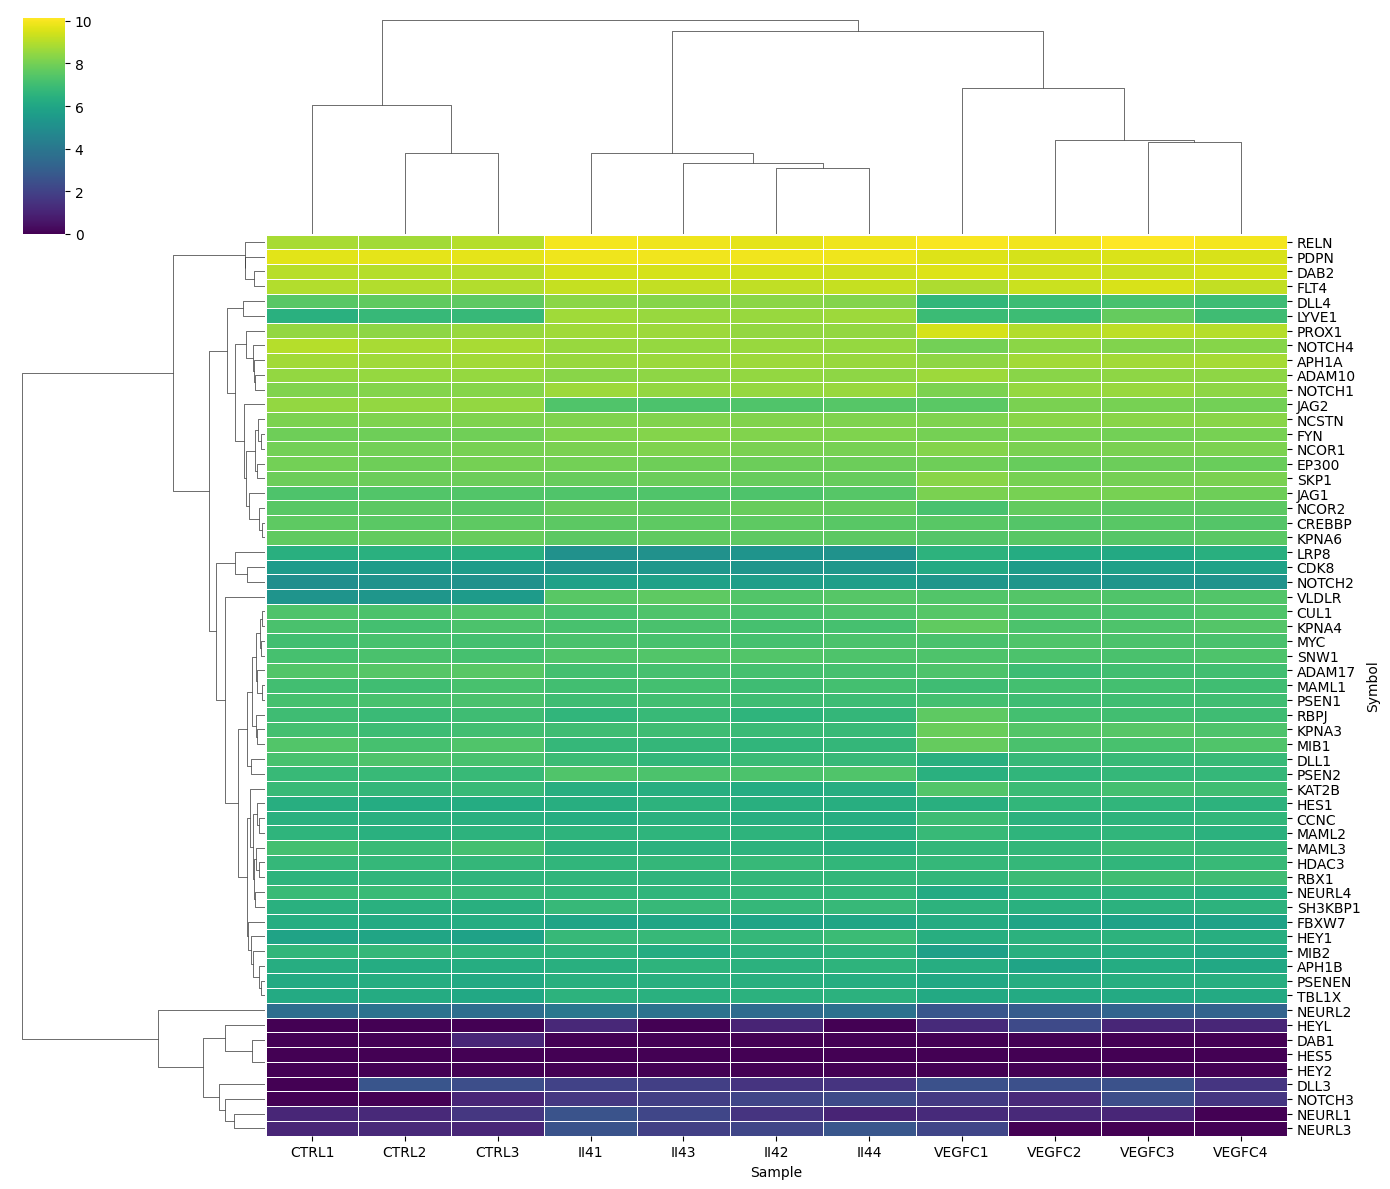

In [44]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

dds_signs = dds[:, dds.var_names.isin(gene_nodes)]
grapher = pd.DataFrame(dds_signs.layers['log1p'].T, index=dds_signs.var_names, columns=dds_signs.obs_names)

g = sns.clustermap(grapher, cmap='viridis', figsize=(14, 12), 
                   cbar_pos=(0.02, 0.8, 0.03, 0.18),
                   linewidths=0.5, col_cluster=True, row_cluster=True,
                   yticklabels=True, xticklabels=True)

In [45]:
log2_normed_counts = np.log2(dds.layers['normed_counts'] + 1)

log2_normed_counts_df = pd.DataFrame(
    log2_normed_counts.T,
    index=dds.var_names,
    columns=dds.obs_names
)

log2_normed_counts_df = log2_normed_counts_df.loc[log2_normed_counts_df.index.intersection(gene_nodes)]
log2_normed_counts_df.to_csv(r'.\GSE171278_outputs\GSE171278_DESeq2_log2_norm.csv', sep=',')

log2_normed_counts_df

Sample,CTRL1,CTRL2,CTRL3,II41,II42,II43,II44,VEGFC1,VEGFC2,VEGFC3,VEGFC4
Symbol,,,,,,,,,,,
ADAM10,12.261241,12.304818,12.319836,11.989815,12.214984,12.153134,12.142477,12.493275,11.991987,12.110030,12.141787
ADAM17,10.661981,10.773020,10.841613,10.240226,10.295926,10.289565,10.280055,10.507181,10.000655,10.184290,10.209299
APH1A,12.565701,12.531845,12.558087,12.366297,12.455526,12.432431,12.384690,12.138557,12.599548,12.613011,12.653375
APH1B,9.122948,8.980410,9.040109,9.246410,9.307339,9.420287,9.434211,9.121584,8.545955,8.977549,8.767131
CCNC,9.257367,9.218547,9.237836,9.031868,9.161034,9.273671,9.123784,10.040702,9.304502,9.439847,9.589367
...,...,...,...,...,...,...,...,...,...,...,...
SH3KBP1,9.285611,9.286525,9.242566,9.781554,9.736065,9.784540,9.761592,9.406826,9.289678,9.304631,9.367887
SKP1,11.342186,11.311392,11.354390,11.196427,11.241759,11.343101,11.188720,12.034153,11.607770,11.567765,11.647990
SNW1,10.323573,10.435722,10.319563,10.575864,10.626261,10.653057,10.515368,10.525288,10.457217,10.445045,10.551929


In [46]:
dds.varm['LFC']

,Intercept,Condition[T.II4],Condition[T.VEGFC]
Symbol,,,
A1BG,4.042129,0.099756,-0.479638
A1BG-AS1,5.200673,-0.437217,-0.622927
A1CF,NaN,NaN,NaN
A2M,10.453044,-0.369240,-0.411154
A2M-AS1,3.212717,0.169183,0.557924
...,...,...,...
ZYG11A,-1.659860,1.579030,2.454586
ZYG11B,6.665276,-0.358703,-0.126693
ZYX,8.316533,0.265313,0.413656


In [47]:
log2fc = dds.varm['LFC']['Condition[T.VEGFC]']

results_df = pd.DataFrame({
    'log2FoldChange': log2fc
}, index=dds.var_names)

filtered_df = results_df[np.abs(results_df['log2FoldChange']) > 1]
filtered_df = filtered_df.loc[filtered_df.index.intersection(gene_nodes)] # Shows the log2 FC of genes of interest

filtered_df


,log2FoldChange
Symbol,
DAB1,-1.240147
HEYL,2.968466
NOTCH3,2.025131
RELN,1.146864
VLDLR,2.018125


In [48]:
log2fc = dds.varm['LFC']['Condition[T.II4]']

results_df = pd.DataFrame({
    'log2FoldChange': log2fc
}, index=dds.var_names)

filtered_df = results_df[np.abs(results_df['log2FoldChange']) > 1]
filtered_df = filtered_df.loc[filtered_df.index.intersection(gene_nodes)] # Shows the log2 FC of genes of interest

filtered_df

,log2FoldChange
Symbol,
DAB1,-1.351604
HEYL,1.614451
JAG2,-1.120761
LRP8,-1.279966
LYVE1,1.947193
NEURL3,1.559869
NOTCH3,2.246394
RELN,1.004454
VLDLR,2.131953
